<b>Machine Learning Exercise session: 2 September 2025</b>

# <b>Working with: LINEAR REGRESSION</b>

Welcome to this week's exercise session. Today, we will learn about _LINEAR REGRESSION_. This notebook will take you through 
- Linear Regression

The exercises are structured in 3 sections. 

Remember 
- It is good practice to use the Machine Learning python environment you made in week 1. *Ensure that you are working within the virtual environment (venv) with **conda activate ml**. where **ml** is the name of the venv, and/or selecting it on VSCode/Jupyter*
- Solving these exercises is supposed to take much longer than 90 minutes. Work on them before going to class.
- Learning Machine Learning is challenging. Take your time, make some errors, and read the documentation if needed. <b>We are happy to help if you are stuck.</b>

Have fun! 

# <b>Exploring theoretical background</b>

# Exercise t0
***Disclaimer :** This exercise is made for you to get an intuition on linear regression. In doing so, you are free to sketch on paper or to code your solution.*

Imagine we have a dataset with two features: $x_1$ and $x_2$, which are numerical (real-valued) variables.

Consider the following models:

**(a)**  $Y = \beta_0 + \beta_1 x_1 + \epsilon$

**(b)**  $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon$

**(c)**  $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 (x_1 x_2) + \epsilon$

**(d)**  $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 (x_1 x_2) + \beta_4 x_1^2 + \beta_5 x_2^2 + \epsilon$

---

### **Part 1**

Explain how a unit change in $x_1$ would affect $Y$ (leaving $x_2$ unchanged) in each of the models (a–d).

---

### **Part 2**

Make a plot of the functional relationship between $Y$ and the two features in each of the models (a–d).

---

### **Part 3**

A linear regression model can also be formulated in matrix notation as:

$$
Y = X\beta + \epsilon
$$

Write down $X$ for each of the models (a–d). Explain the meaning of columns and rows.

---

### **Part 4**

Introduce now a third, categorical feature $C$ with two levels: yes/no.

$$
Y = \beta_0 + \beta_1 x_1 + \beta_2 C_{\text{yes}} + \epsilon
$$

What is its interpretation? How does it differ from Part 3?

---

### **Part 5**

Plot and explain the effect of adding a categorical variable $C$ to the relationship between $Y$ and $x_1$, and $x_2$. Introduce interactions between $C$ and $x_1$ in (a), between $C$ and $x_1, x_2$ in (b), between $C$ and $x_1 x_2$ in (c), between $C$ and $x_1^2$ in (d). You can also try different combinations to see how adding a binary coefficient affects the plot of $Y$.


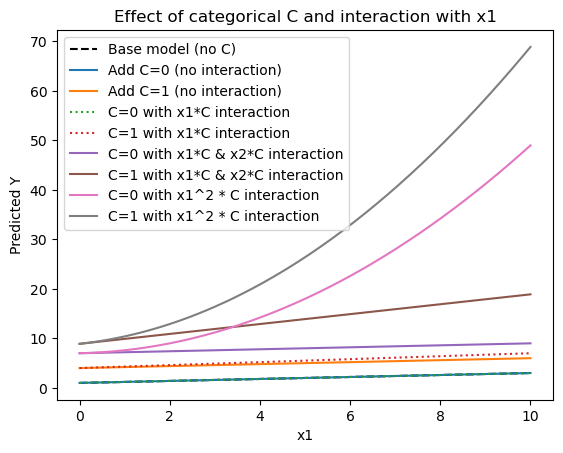

In [1]:
import numpy as np
import matplotlib.pyplot as plt

b0, b1, b2, b3, b4, b5, b6, b7 = 1, 0.2, 3, 0.1, 0.8, 0.9, 0.4, 0.1


x1 = np.linspace(0, 10, 200)
x2 = 2
C_levels = [0,1]
y_base = b0 + b1*x1
plt.plot(x1, y_base, 'k--', label='Base model (no C)')
for C in C_levels:
    y2 = b0+b1*x1+b2*C
    plt.plot(x1, y2, label=f'Add C={C} (no interaction)')
for C in C_levels:
    y3 = b0 + b1*x1 + b2*C + b3*(x1*C)
    plt.plot(x1, y3, linestyle=':', label=f'C={C} with x1*C interaction')
for C in C_levels:
    y4=b0+b1*x1+b2*x2+b3*C+b4*(x1*C)+b5*(x2*C)
    plt.plot(x1,y4,linestyle="-",label=f'C={C} with x1*C & x2*C interaction')
for C in C_levels:
    y5=b0+b1*x1+b2*x2+b3*C+b4*(x1*C)+b5*(x2*C)+b6*(x1**2)+b7*(x1**2 * C)
    plt.plot(x1,y5,linestyle="-",label=f'C={C} with x1^2 * C interaction')
plt.xlabel('x1')
plt.ylabel('Predicted Y')
plt.title('Effect of categorical C and interaction with x1')
plt.legend()
plt.show()


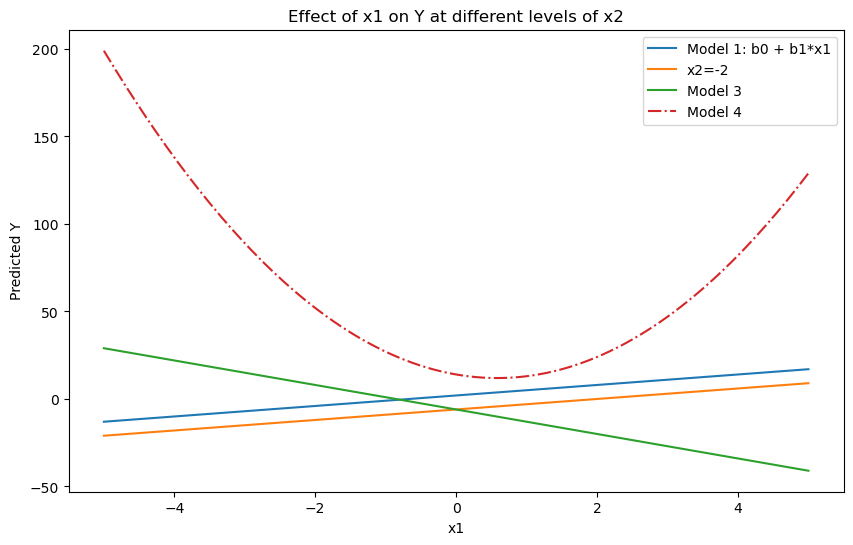

In [146]:
# Solutions if needed
import numpy as np
import matplotlib.pyplot as plt
beta_0=2
beta_1=3
beta_2=4
beta_3=5
beta_4=6

x1 = np.linspace(-5,5,200)
x2_values = [-2]
plt.figure(figsize=(10,6))
y1 = beta_0 + beta_1*x1
plt.plot(x1, y1, label="Model 1: b0 + b1*x1")
for x2 in x2_values:
    y2=beta_0+beta_1*x1+beta_2*x2
    plt.plot(x1, y2, label=f"x2={x2}")
for x2 in x2_values:
    y3=beta_0+beta_1*x1+beta_2*x2+beta_3*(x1*x2)
    plt.plot(x1,y3,label="Model 3")
for x2 in x2_values:
    y4=beta_0+beta_1*x1+beta_2*x2+beta_3*(x2*x1)+beta_4*(x1**2)+5*(x2**2)
    plt.plot(x1, y4, '-.', label=f"Model 4")
plt.xlabel("x1")
plt.ylabel("Predicted Y")
plt.legend()
plt.title("Effect of x1 on Y at different levels of x2")
plt.show()



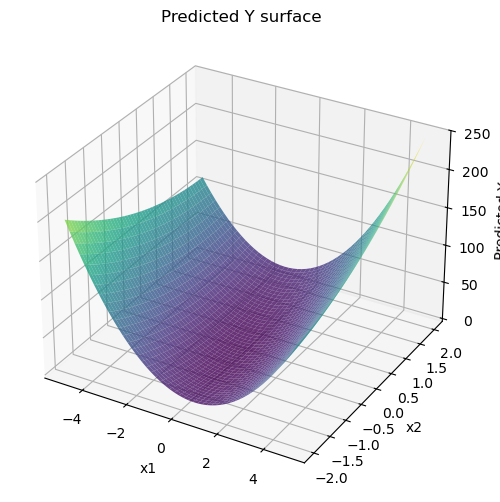

In [149]:
from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(-5,5,50)
x2 = np.linspace(-2,2,50)
X1, X2 = np.meshgrid(x1, x2)
Y = beta_0 + beta_1*X1 + beta_2*X2 + beta_3*(X1*X2) + beta_4*(X1**2) + 5*(X2**2)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis', alpha=0.8)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("Predicted Y")
plt.title("Predicted Y surface")
plt.show()


# Exercise t1
Compute the least squares estimate for $\hat{\beta_0}$ and $\hat{\beta_1}$.

Given a simple linear regression model with independent observations:

$$
y = \beta_0 + \beta_1 x + \varepsilon, \quad \varepsilon_i \sim N(0, \sigma^2), \quad i = 1, \dots, n
$$

It is helpful to know that the parameters minimizing the residual sum of squares (RSS) are given by:

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$
$$
\hat{\beta}_1 = \frac{s_{xy}}{s^2_x}
$$

where $\bar{x}$ and $\bar{y}$ are the sample means, $s^2_x$ is the sample variance of $x$, and $s_{xy}$ is the sample covariance between $x$ and $y$.

(*Hint: Recall Linear regression from Applied Statistics*)

In [3]:
# Solutions if needed
import random
""" 
The solution would be to compute the estimates of B0 and B1, given the values of x and y.

Since im not sure what values to use, I will generate some random.
"""
x_values = [random.random() for _ in range(10)]
y_values = [random.random() for _ in range(10)]
x_var = np.var(x_values,ddof=1)
x_mean = np.mean(x_values)
x_y_var = np.cov(x_values, y_values,ddof=1)[0,1]
y_mean = np.mean(y_values)
est_b1 = x_y_var/x_var
est_b0 = y_mean - est_b1 * x_mean

In [4]:
est_b1, est_b0

(np.float64(0.3865355556703951), np.float64(0.3955973570894399))

# Exercise t2

## Effect of Feature Scaling on Linear Regression Coefficients

Consider two datasets:

- **D₁**: Contains a feature `x` (e.g., height in **centimeters**)
- **D₂**: Identical to D₁, except `x` is scaled by a factor of $a$ (e.g., height in **meters**, where $a = 0.01$)

Show how this scaling affects the **estimated coefficients** $\boldsymbol{\beta}$ in a linear regression model.

1. What happens to the beta parameters we find for the models?
2. How does this influence our interpretation of the model?


In [5]:
# Solutions if needed
""" 
The beta parameters would be come smaller, if we convert the centimeters to meters instead, due to how the comma is moved and the number becomes smaller.
This is also due to the least squares estimate of the parameters, which is influenced both by variance of x and y, but also the means.

We might start lower on the y axis, going from 172cm to 1,72m and maybe slowly increase, while in centimeters the slope would be greater.
"""

' \nThe beta parameters would be come smaller, if we convert the centimeters to meters instead, due to how the comma is moved and the number becomes smaller.\nThis is also due to the least squares estimate of the parameters, which is influenced both by variance of x and y, but also the means.\n\nWe might start lower on the y axis, going from 172cm to 1,72m and maybe slowly increase, while in centimeters the slope would be greater.\n'

# <b>Applying what you learned</b>

### Documentation

LIBRARIES AND METHODS EXPECTED TO BE USED:
- numpy : https://numpy.org/doc/stable/index
- pandas : https://pandas.pydata.org/pandas-docs/stable/
- matplotlib.pyplot : https://matplotlib.org/stable/tutorials/pyplot.html
- scipy.stats : https://docs.scipy.org/doc/scipy/tutorial/stats.html
- sklearn : https://sklearn.org/stable/getting_started.html
  - datasets : https://scikit-learn.org/stable/api/sklearn.datasets.html
  - linear_model : https://sklearn.org/stable/api/sklearn.linear_model.html
  - model_selection : https://sklearn.org/stable/api/sklearn.model_selection.html
  - metrics : https://scikit-learn.org/stable/api/sklearn.metrics.html

# Exercise a1

***Disclaimer:** As stated above, it's not expected to fully finish this exercise. There are multiple ways of approaching it. It is highly encouraged to go through the main points, reflecting on the meaning of linear regression.*

Following on from the diabetes exercises of last week (*Ex.5 week 1*):

1. Import the diabetes dataset from sklearn and find the proper column names
   - Which of the variables, in your opinion, mostly influence the progression of diabetes? Why?
3. Compute the correlation matrix and visualize it (*Hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html*)
   - What does that mean? Does that match your expectation from the previous point?
   - Which variables are the MOST correlated?
   - EXTRA: Another way to visualize a dataset is through a pairplot, build one using matplotlib
5. Plot and fit BMI and LTG vs progression separately:
   - Fit with np.polyfit
   - Fit with LinearRegression from sklearn
   - Compare the output and explain the difference
6. Use sklearn to evaluate the model:
      - Split the dataset in test and train using train_test_split(x, y, test_size=0.2, random_state=42)
      - Note: the importance of splitting a dataset for prediction will be a topic of the upcoming weeks.
   - Compute the intercept and the slopes for the whole model,
   - Compute their 95% confidence intervals and p-values.
   - Compute $R^2$ for test and train using LinearRegression, how do they compare? Why?
   - Compute $R^2$, MAE, and RMSE for the test using metrics. What do they mean?
   - EXTRA : Use hypothesis testing (backward, forward, and mixed approach) for the $\beta_i$ to get the most relevant.
       - How do the three approaches compare? Were you expecting those results? Why? Which one would you trust the most?
       - Spend a few words on their interpretation.
7. EXTRA: Evaluate the F-statistic for the overall model, and for the models coming out from the hypothesis testing. Which model would you choose?
7. Plot the actual vs predicted values in the best possible way.
9. Plot the binned histogram of the residuals.
   - Do they fulfill the requirements for applying a linear regression? Why?
   - EXTRA: Test the hypothesis of normality. 

In [95]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

data = load_diabetes()
feature_names = data["feature_names"]
X = data["data"]
Y = data["target"]
model = LinearRegression()
model.fit(X,Y)
coef = model.coef_
df_coef = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})
df_coef["Abs_Coefficient"] = df_coef["Coefficient"].abs()
df_coef = df_coef.sort_values(by="Abs_Coefficient", ascending=False)

print(df_coef)
# Solution: 

  Feature  Coefficient  Abs_Coefficient
4      s1  -792.175639       792.175639
8      s5   751.273700       751.273700
2     bmi   519.845920       519.845920
5      s2   476.739021       476.739021
3      bp   324.384646       324.384646
1     sex  -239.815644       239.815644
7      s4   177.063238       177.063238
6      s3   101.043268       101.043268
9      s6    67.626692        67.626692
0     age   -10.009866        10.009866


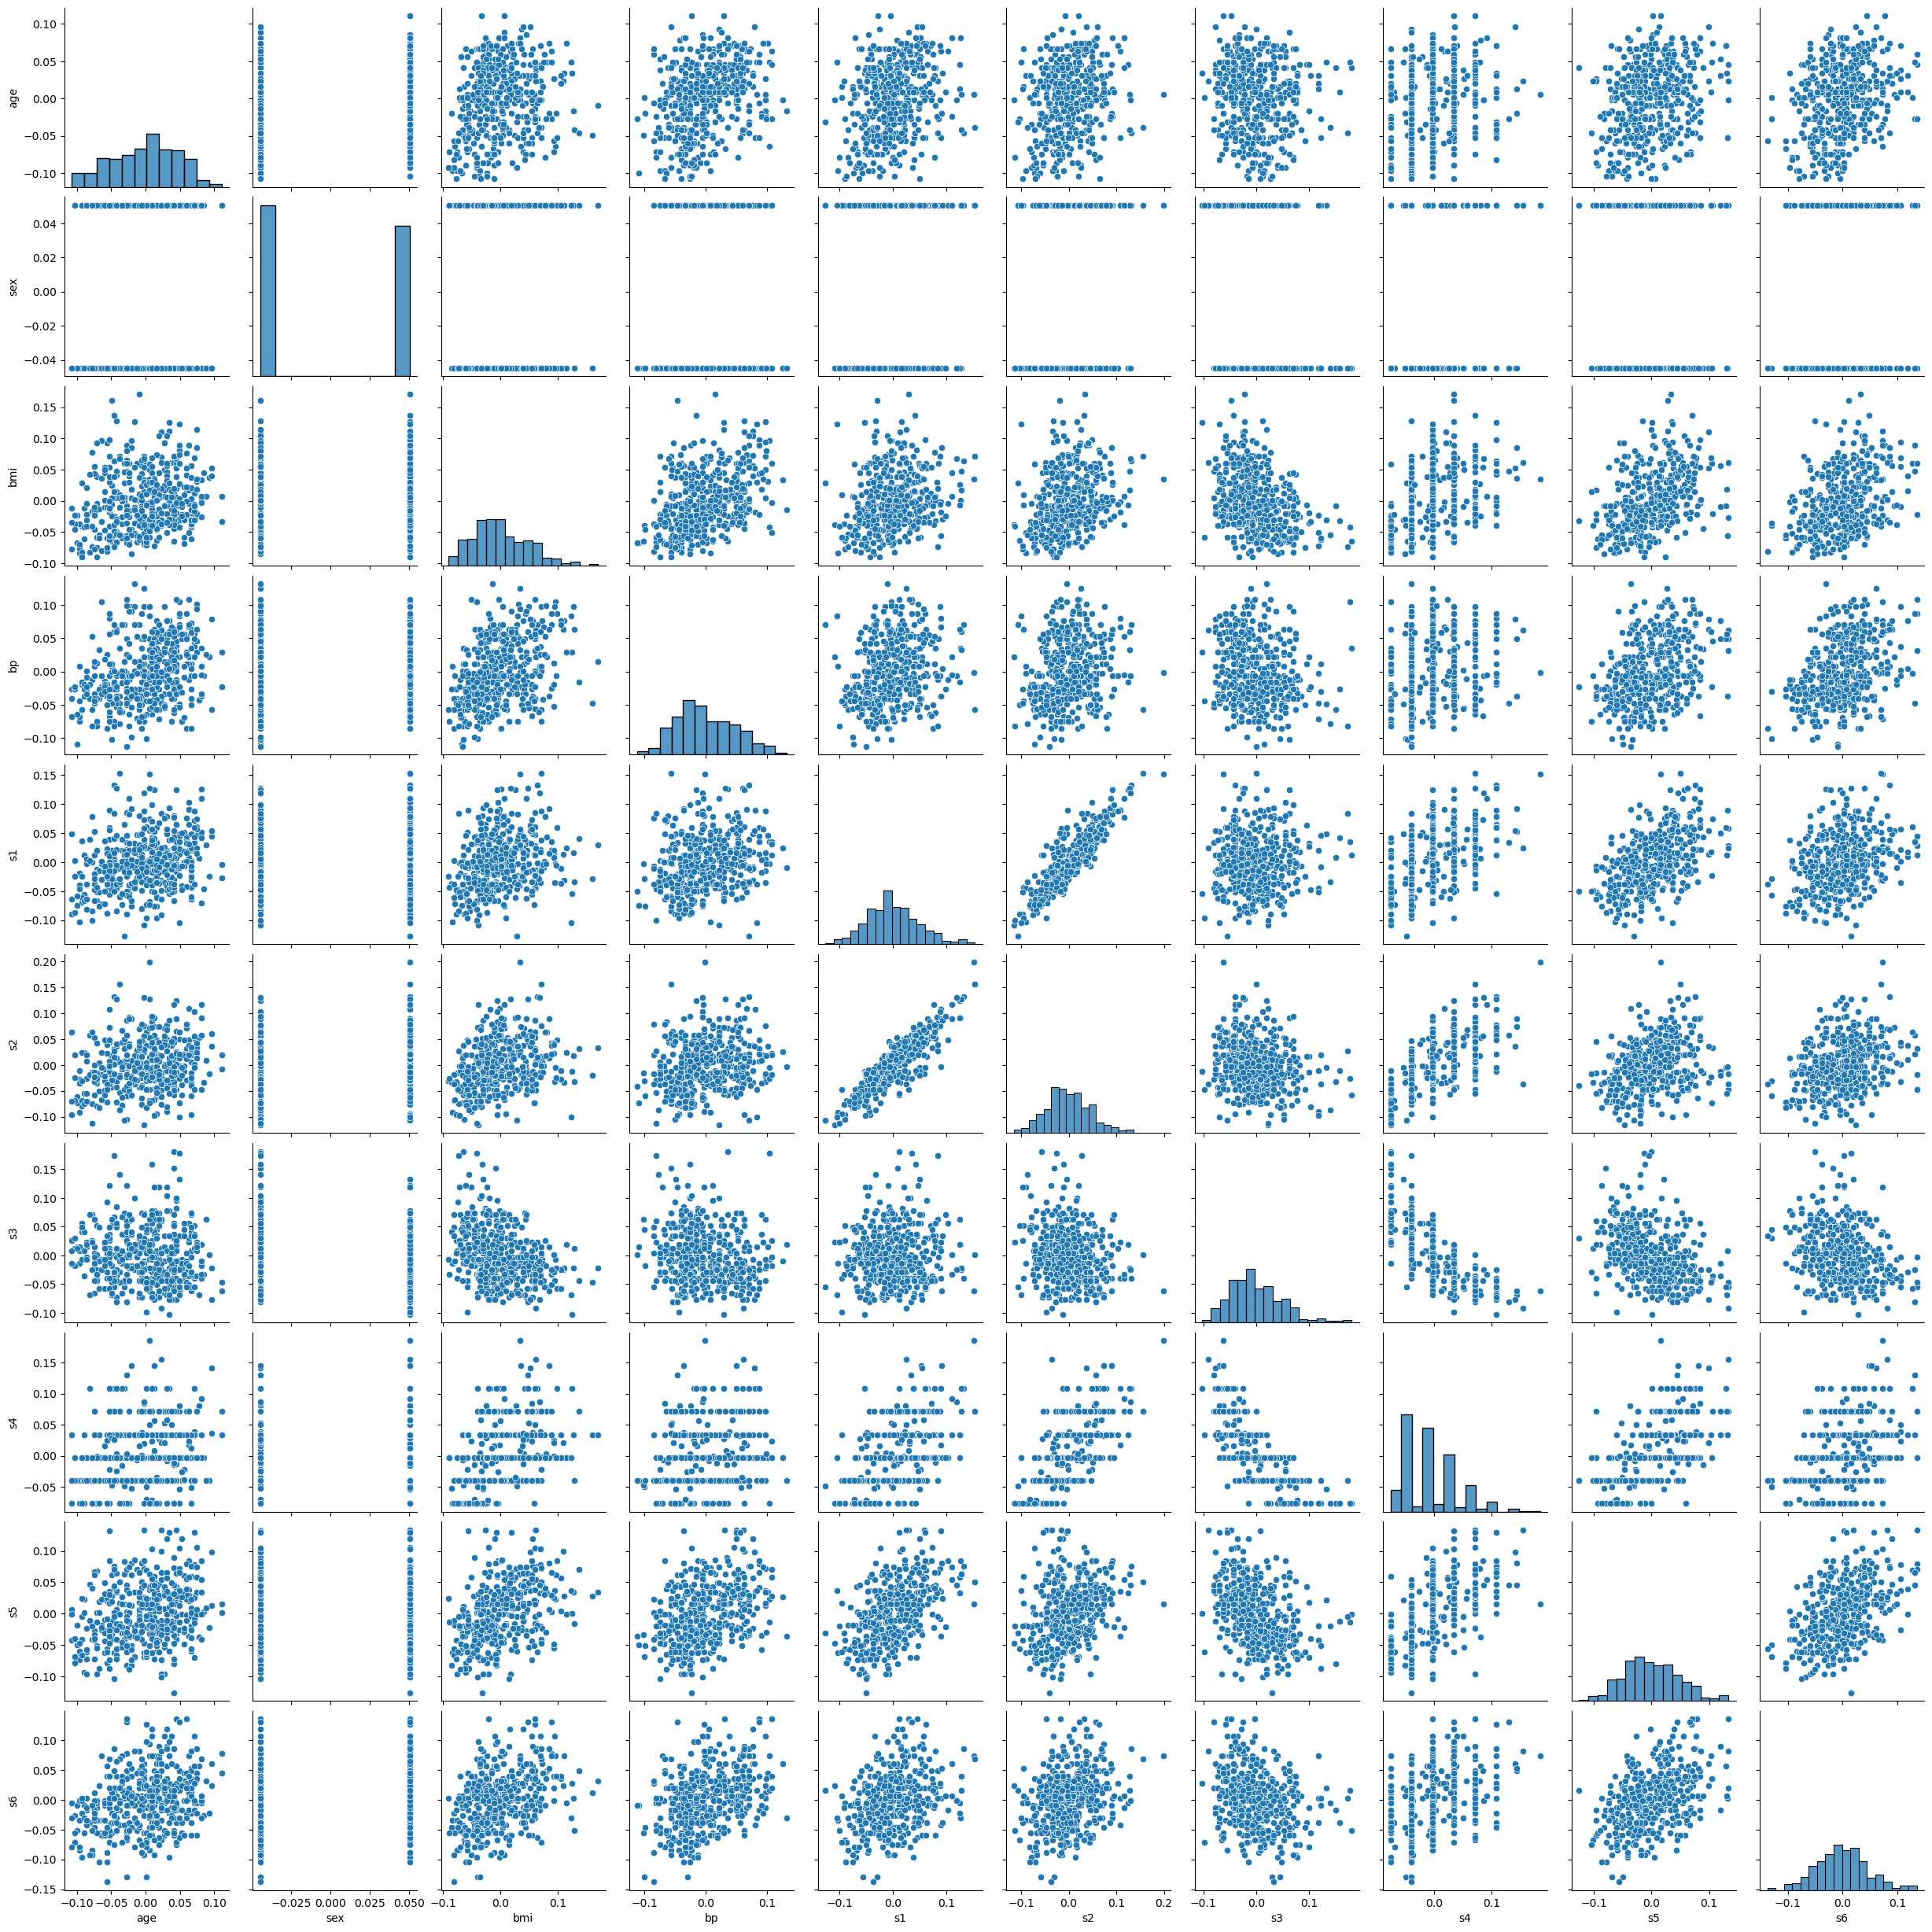

In [7]:
df_x = pd.DataFrame(X,columns=data["feature_names"])
corr_matrix = df_x.corr()
corr_matrix
sns.pairplot(df_x)
plt.show()
#S1 and S2 are highly correlated in a linear relationship.

/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


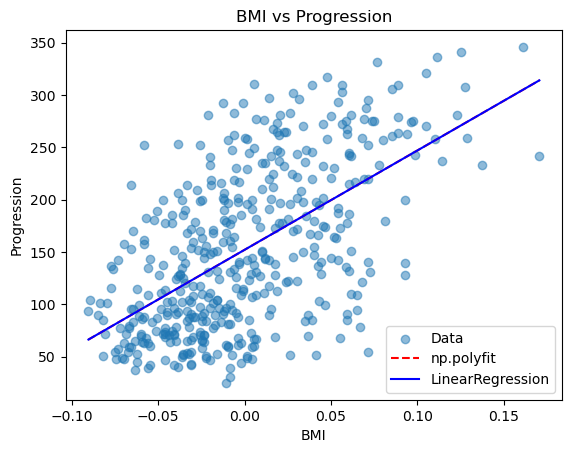

np.poly fit coeff:  [949.43526038 152.13348416]
LinearRegression coeff:  [949.43526038]
LinearRegression coeff:  152.13348416289617


In [61]:
#plotting bmi and ltg/s5 from load_diabetes.
from sklearn.metrics import mean_squared_error
df = pd.DataFrame(data.data, columns=data.feature_names)

X_bmi = df[["bmi"]]
x_s5 = df["s5"]
y_prog = data["target"]

coeffs_bmi = np.polyfit(X_bmi.values.flatten(), y_prog, deg =1)
poly_bmi = np.poly1d(coeffs_bmi)

x_line = np.linspace(X_bmi.min(), X_bmi.max(), 100)
y_polyfit = poly_bmi(x_line)

model_bmi = LinearRegression().fit(X_bmi, y_prog)
y_lr = model_bmi.predict(x_line.reshape(-1, 1))

plt.scatter(X_bmi, y_prog, alpha=0.5, label="Data")
plt.plot(x_line, y_polyfit, "r--", label="np.polyfit")
plt.plot(x_line, y_lr, "b-", label="LinearRegression")
plt.xlabel("BMI")
plt.ylabel("Progression")
plt.title("BMI vs Progression")
plt.legend()
plt.show()
print("np.poly fit coeff: ", coeffs_bmi)
print("LinearRegression coeff: ", model_bmi.coef_)
print("LinearRegression coeff: ", model_bmi.intercept_)

/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


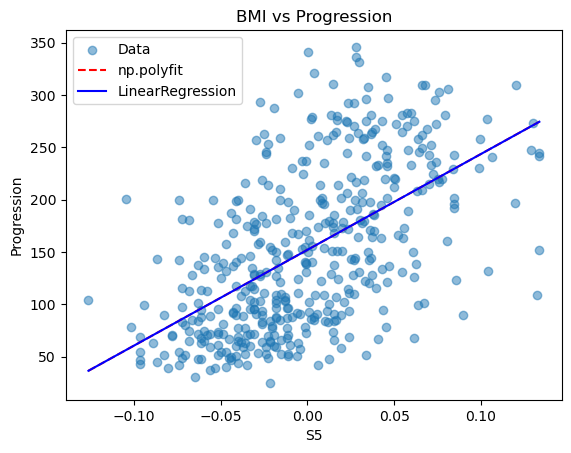

np.poly fit coeff:  [916.13737455 152.13348416]
LinearRegression coeff:  [916.13737455]
LinearRegression coeff:  152.13348416289585


In [66]:
#plotting bmi and ltg/s5 from load_diabetes.
from sklearn.metrics import mean_squared_error
df = pd.DataFrame(data.data, columns=data.feature_names)

X_bmi = df[["bmi"]]
x_s5 = df[["s5"]]
y_prog = data["target"]

coeffs_s5 = np.polyfit(x_s5.values.flatten(), y_prog, deg =1)
poly_s5 = np.poly1d(coeffs_s5)

x_line = np.linspace(x_s5.min(), x_s5.max(), 100)
y_polyfit = poly_s5(x_line)

model_s5 = LinearRegression().fit(x_s5, y_prog)
y_lr = model_s5.predict(x_line.reshape(-1, 1))

plt.scatter(x_s5, y_prog, alpha=0.5, label="Data")
plt.plot(x_line, y_polyfit, "r--", label="np.polyfit")
plt.plot(x_line, y_lr, "b-", label="LinearRegression")
plt.xlabel("S5")
plt.ylabel("Progression")
plt.title("BMI vs Progression")
plt.legend()
plt.show()
print("np.poly fit coeff: ", coeffs_s5)
print("LinearRegression coeff: ", model_s5.coef_)
print("LinearRegression coeff: ", model_s5.intercept_)

In [99]:
""" 6. Use sklearn to evaluate the model:
      - Split the dataset in test and train using train_test_split(x, y, test_size=0.2, random_state=42)
      - Note: the importance of splitting a dataset for prediction will be a topic of the upcoming weeks.
   - Compute the intercept and the slopes for the whole model,
   - Compute their 95% confidence intervals and p-values.
   - Compute $R^2$ for test and train using LinearRegression, how do they compare? Why?
   - Compute $R^2$, MAE, and RMSE for the test using metrics. What do they mean?
   - EXTRA : Use hypothesis testing (backward, forward, and mixed approach) for the $\beta_i$ to get the most relevant.
       - How do the three approaches compare? Were you expecting those results? Why? Which one would you trust the most?
       
       - Spend a few words on their interpretation."""
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test) # predicted y values
y_train_pred = model.predict(X_train)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)


beta_hat = np.hstack([model.intercept_, model.coef_])
X_train_np = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
residuals = y_test - y_test_pred
n = X_train.shape[0]        # number of training samples
p = X_train.shape[1]        # number of features
sigma_squared_hat = (residuals.T @ residuals) / (n - p - 1) #estimate residual variance "@" is ued for matrix multiplication.
var_beta_hat = sigma_squared_hat * np.linalg.inv(X_train_np.T @ X_train_np) #using the estimated residual variance and the design matrix.
#we can compute the variance-covariance matrix
se_beta_hat = np.sqrt(np.diag(var_beta_hat)) #extracts diagonal elements from the matrix, which is the variance of each coefficient.
#Which gives us the standard error of each coefficient.
alpha = 0.05
t_val = stats.t.ppf(1 - alpha/2, df=n-p-1)

ci_lower = beta_hat - t_val * se_beta_hat
ci_upper = beta_hat + t_val * se_beta_hat
feature_names = ["intercept"] + [f"X{i}" for i in range(X_train.shape[1])]

for i, col in enumerate(feature_names):
    print(f"{col}: 95% CI = [{ci_lower[i]:.3f}, {ci_upper[i]:.3f}]")
t_stats = beta_hat / se_beta_hat
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=n-p-1))

for i, col in enumerate(feature_names):
    print(f"{col}: p-value = {p_values[i]:.5f}")







print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)


print("MAE:", mae, "MSE:", mse)
print("RMSE", rmse)
print("R^2 for test: ", r2_test)
print("R^2 for train: ", r2_train)
#Not that great usin


intercept: 95% CI = [148.464, 154.227]
X0: 95% CI = [-30.673, 106.481]
X1: 95% CI = [-310.058, -173.870]
X2: 95% CI = [466.007, 618.851]
X3: 95% CI = [276.842, 418.566]
X4: 95% CI = [-1379.499, -483.479]
X5: 95% CI = [156.474, 879.651]
X6: 95% CI = [-67.978, 394.818]
X7: 95% CI = [91.204, 459.432]
X8: 95% CI = [545.096, 927.302]
X9: 95% CI = [-24.256, 121.597]
intercept: p-value = 0.00000
X0: p-value = 0.27773
X1: p-value = 0.00000
X2: p-value = 0.00000
X3: p-value = 0.00000
X4: p-value = 0.00005
X5: p-value = 0.00511
X6: p-value = 0.16571
X7: p-value = 0.00349
X8: p-value = 0.00000
X9: p-value = 0.19016
Intercept:  151.34560453985995
Coefficients:  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
MAE: 42.79409467959994 MSE: 2900.193628493482
RMSE 53.85344583676593
R^2 for test:  0.45260276297191937
R^2 for train:  0.5279193863361498


array([[ 2.14647792e+00, -1.23823211e+00,  2.30278533e-01,
        -1.20635261e+00,  1.97243679e-02, -1.81736264e+00,
         2.90951365e+00,  1.67775939e+00,  8.98170815e-01,
         5.00889289e-01, -1.36176577e+00],
       [-1.23823211e+00,  1.21556635e+03, -1.70442611e+02,
        -1.18897988e+01, -2.08695853e+02,  1.55914096e+02,
        -3.44245053e+02, -1.40478623e+02,  1.57826859e+02,
        -2.64528234e+02, -1.50080094e+02],
       [ 2.30278533e-01, -1.70442611e+02,  1.19851471e+03,
         2.36818466e+02, -2.15391950e+02,  2.32370032e+02,
        -3.83679724e+01,  1.54921276e+02, -4.55305697e+02,
         1.31774747e+02, -5.25419221e+01],
       [-1.20635261e+00, -1.18897988e+01,  2.36818466e+02,
         1.50960610e+03, -3.65375683e+02,  9.66450392e+02,
        -8.66368853e+02, -7.17721144e+01, -1.61100621e+02,
        -6.59448126e+02, -2.00482674e+02],
       [ 1.97243679e-02, -2.08695853e+02, -2.15391950e+02,
        -3.65375683e+02,  1.29792789e+03, -3.90822252e+02,
  

R^2 for test = 0.45260276297191937 and for train = 0.5279193863361498. It seems the model is better at explaining the variance on the training data, rather than the unseen test data. This might indicate a non-linear relationship between the variables, but also might explain some variables dont have statisctically significance in our model. Such as X6 which has a p-value of 1.6571. 

For the MAE at 42.79409467959994, this means our predictions are off by around 42,8 units. Its the absolute average difference between predicted values and the true values.


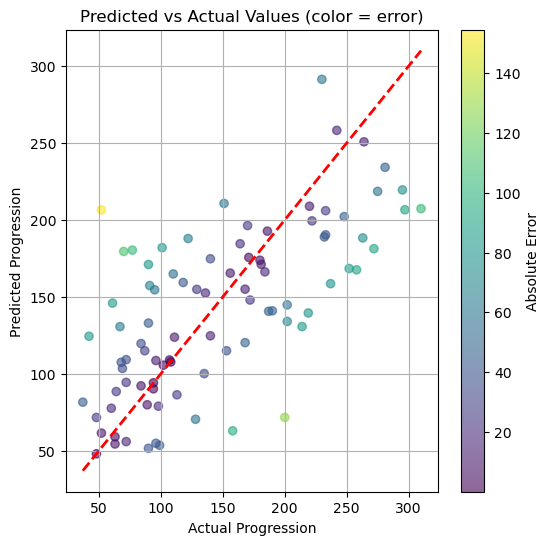

In [91]:
#Plotting actual vs predicted, we use test values.

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, c=np.abs(residuals), cmap='viridis', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.colorbar(label="Absolute Error")
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression") 
plt.title("Predicted vs Actual Values (color = error)")
plt.grid(True)
plt.show()

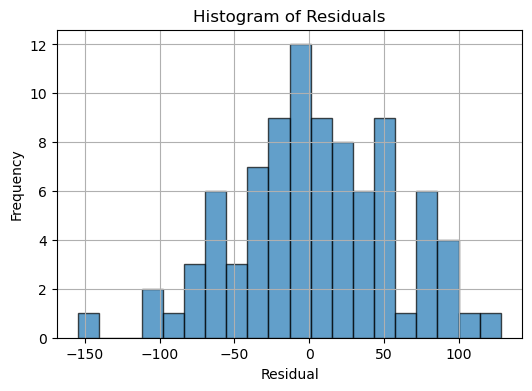

In [92]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()
""" 
The residuals show a roughly normal distribution around 0, which indicate some linearity in the model.
"""

In [93]:
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", p_value)

if p_value > 0.05:
    print("Residuals appear normally distributed (fail to reject H0).")
else:
    print("Residuals are not normally distributed (reject H0).")

Shapiro-Wilk test statistic: 0.9926699146266023
p-value: 0.9066468957080915
Residuals appear normally distributed (fail to reject H0).


# Exercise e1
During a survey heights, weights, and sexes of 1000 individuals were collected by four different people. The data are stored in four different height.csv files, namely height_1.csv, height_2.csv, height_3.csv, height_4.csv.
Due to some rookie mistake, the first column of each has been formatted in a different way, but nobody noticed during the data collection. 
It's your time to analyze the four datasets to try to predict the weight based on the height and sex. 

1. Import the data and visually inspect it. What conclusion can you make? Why?
2. Do you believe that this case can be modeled linearly? What makes you think that?
3. ASSUME a linear model. Perform a regression and evaluate it for every dataset (hint: inspect slope, intercept, MSE, $R^2$). What do you notice? Explain the discrepancies and their reasons in a few words.
4. A further division can be made based on sex. Do you believe is reasonable?
5. ASSUME it is true. Split the data based on sex, do a regression for each, and plot it, then evaluate the model. Does it look reasonable? Why?
6. Conclusion: Have you identified the transformations that have been made on the first column? Think at how you would have done in case of a mixed dataset. 

/var/folders/q8/ztn6c_nj7mz53t10363qj1600000gn/T/ipykernel_2673/3309421469.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "intercept" : float(model.intercept_)
/var/folders/q8/ztn6c_nj7mz53t10363qj1600000gn/T/ipykernel_2673/3309421469.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "intercept" : float(model.intercept_)
/var/folders/q8/ztn6c_nj7mz53t10363qj1600000gn/T/ipykernel_2673/3309421469.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "intercep

[{'Dataset': 'Dataset_1',
  'R2': 0.4702050661111943,
  'MSE': 24.807452328607837,
  'Coef': [array([0.47942383])],
  'intercept': 53.856107998487886},
 {'Dataset': 'Dataset_2',
  'R2': 0.4702050661111943,
  'MSE': 24.80745232860784,
  'Coef': [array([47.94238293])],
  'intercept': 53.85610799848787},
 {'Dataset': 'Dataset_3',
  'R2': 0.4694330503718569,
  'MSE': 24.84360168079203,
  'Coef': [array([12.5012991])],
  'intercept': -27.571405573347278},
 {'Dataset': 'Dataset_4',
  'R2': 0.4705927352359949,
  'MSE': 24.789299864857057,
  'Coef': [array([0.00140315])],
  'intercept': 94.67310424333346}]

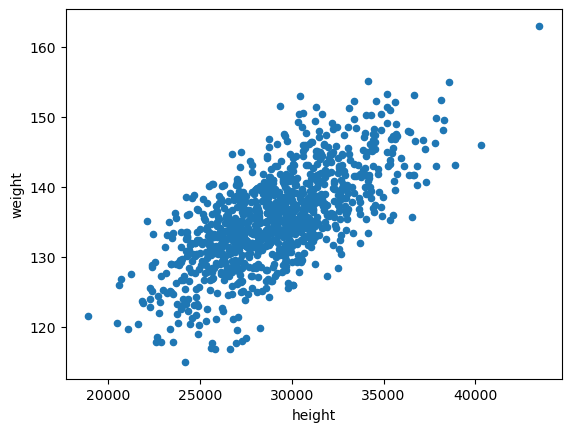

In [143]:

# Solution:
# Looking at the scatterplot for each dataset between height and weight it could look like there is some linear relationship between these two.
# Its hard to look at sex also, because its either 0 or 1, so its categorical. 
df1 = pd.read_csv("height_1.csv")
df2 = pd.read_csv("height_2.csv")
df3 = pd.read_csv("height_3.csv")
df4 = pd.read_csv("height_4.csv")
#df2["height"] = df2["height"]*100

target_col = "weight"

models = []
results = []
metrics_list = []
df4.plot.scatter(x="height", y="weight")
datasets = [df1,df2,df3,df4]
for i, df in enumerate(datasets, 1):
    X = df[["height"]]
    y = df[[target_col]]
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    models.append(model)
    coef_dict = {"intercept": model.intercept_}
    coef_dict.update({col: coef for col, coef in zip(X.columns, model.coef_)})
    #mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    metrics_list.append({
        "Dataset": f"Dataset_{i}",
        "R2": r2,
        "MSE": mse,
        "Coef" : list(model.coef_),
        "intercept" : float(model.intercept_)
    })
    
    results.append(pd.DataFrame(coef_dict, index=[f"Dataset_{i}"]))
metrics_list


[{'Dataset': 'Dataset_1',
  'R2': 0.49056080580262906,
  'MSE': 25.28099402653292,
  'Coef': [np.float64(0.5026420051477232)],
  'intercept': np.float64(50.11545946960088)},
 {'Dataset': 'Dataset_2',
  'R2': 0.4480913650729884,
  'MSE': 24.09747701989951,
  'Coef': [np.float64(0.45366886557953195)],
  'intercept': np.float64(58.006649594894924)},
 {'Dataset': 'Dataset_3',
  'R2': 0.49056080580262906,
  'MSE': 25.28099402653292,
  'Coef': [np.float64(50.26420051477236)],
  'intercept': np.float64(50.11545946960081)},
 {'Dataset': 'Dataset_4',
  'R2': 0.4480913650729883,
  'MSE': 24.097477019899515,
  'Coef': [np.float64(45.366886557953194)],
  'intercept': np.float64(58.006649594894924)},
 {'Dataset': 'Dataset_5',
  'R2': 0.4889885375379407,
  'MSE': 25.359018067596974,
  'Coef': [np.float64(13.118148384359456)],
  'intercept': np.float64(-35.404308056742366)},
 {'Dataset': 'Dataset_6',
  'R2': 0.44834302894799094,
  'MSE': 24.08648885254566,
  'Coef': [np.float64(11.822165750030031)],


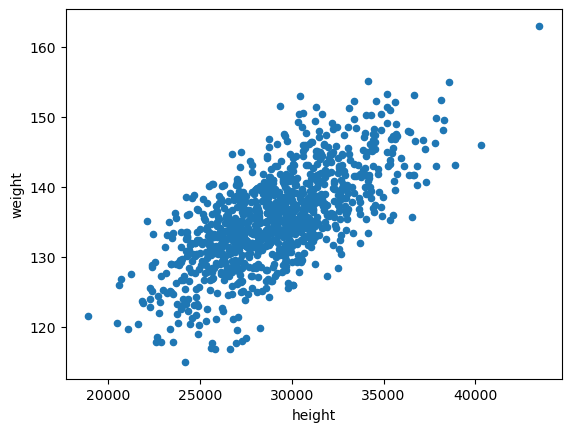

In [154]:
#For sex aswell.
df_male1 = df1[df1["gender"] == "male"]
df_female1 = df1[df1["gender"] == "female"]
df_male2 = df2[df2["gender"] == "male"]
df_female2 = df2[df2["gender"] == "female"]
df_male3 = df3[df3["gender"] == "male"]
df_female3 = df3[df3["gender"] == "female"]
df_male4 = df4[df4["gender"] == "male"]
df_female4 = df4[df4["gender"] == "female"]

target_col = "weight"

models = []
results = []
metrics_list = []
df4.plot.scatter(x="height", y="weight")
datasets = [df_male1,df_female1,df_male2,df_female2,df_male3,df_female3,df_male4,df_female4]
for i, df in enumerate(datasets, 1):
    X = df[["height"]]
    y = df[target_col]
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    models.append(model)
    coef_dict = {"intercept": model.intercept_}
    coef_dict.update({col: coef for col, coef in zip(X.columns, model.coef_)})
    #mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    metrics_list.append({
        "Dataset": f"Dataset_{i}",
        "R2": r2,
        "MSE": mse,
        "Coef" : list(model.coef_),
        "intercept" : model.intercept_
    })
    
    results.append(pd.DataFrame(coef_dict, index=[f"Dataset_{i}"]))
metrics_list

# Exercise e2
There is a strange "linear" correlation between certain food consumption in a country and the number of Nobel prize winners. Let's try to determine to what extent this holds.

1. Inspect the data (scatter plot)
2. Fit the data with a linear regression. Evaluate the model.
3. Evaluate and plot residuals and leverage in a clear way. 
4. Identify 1 point that you deem to be an outlier and/or high leverage.
5. Fit the cleaned dataset and evaluate the new model. How does it compare with the previous one?
6. Identify the second and third possible outliers/high leverage points and remove them.
7. Fit the new model again and compare.
8. Reason on the meaning of the Linear Regression in this scenario.

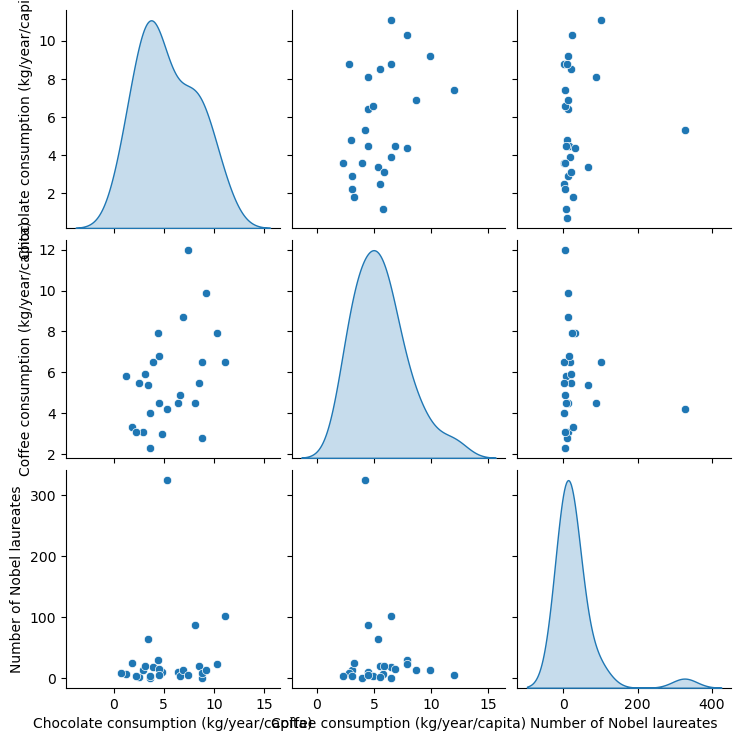

/var/folders/q8/ztn6c_nj7mz53t10363qj1600000gn/T/ipykernel_2673/2603423514.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "intercept" : float(model.intercept_)
/var/folders/q8/ztn6c_nj7mz53t10363qj1600000gn/T/ipykernel_2673/2603423514.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "intercept" : float(model.intercept_)


[{'Dataset': 'Dataset_Chocolate consumption (kg/year/capita)',
  'R2': 0.014437594279019805,
  'MSE': 4018.9733234772148,
  'Coef': [array([2.79664348])],
  'intercept': 16.72471799709154},
 {'Dataset': 'Dataset_Coffee consumption (kg/year/capita)',
  'R2': 0.008407893603437078,
  'MSE': 4043.561524105659,
  'Coef': [array([-2.56392948])],
  'intercept': 46.49114517153748}]

In [175]:
# Solution:
df_consumption = pd.read_csv("country_consumption_nobel.csv")
sns_plot = sns.pairplot(df_consumption, kind="scatter", diag_kind="kde", markers="o", height=2.5)
df_consumption = df_consumption.dropna(subset=["Chocolate consumption (kg/year/capita)",
                       "Coffee consumption (kg/year/capita)",
                       "Number of Nobel laureates"])
plt.show()
predictors = ["Chocolate consumption (kg/year/capita)","Coffee consumption (kg/year/capita)"]
target_col ="Number of Nobel laureates"
models = []
metrics_list = []
for i, col in enumerate(predictors, 0):
    X = df_consumption[[col]]
    y = df_consumption[[target_col]]
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    models.append(model)
    coef_dict = {"intercept": model.intercept_}
    coef_dict.update({col: coef for col, coef in zip(X.columns, model.coef_)})
    #mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    metrics_list.append({
        "Dataset": f"Dataset_{predictors[i]}",
        "R2": r2,
        "MSE": mse,
        "Coef" : list(model.coef_),
        "intercept" : float(model.intercept_)
    })
metrics_list

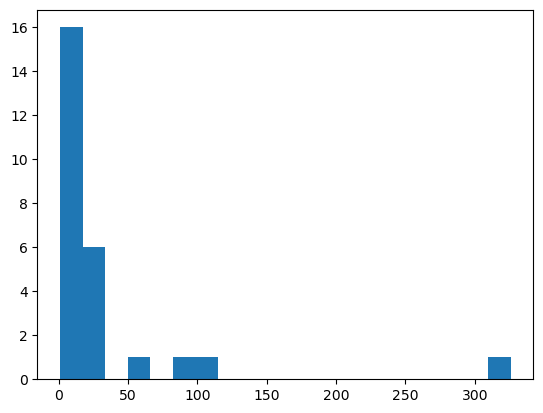

count     26.000000
mean      32.192308
std       65.122665
min        1.000000
25%        5.250000
50%       13.000000
75%       23.250000
max      326.000000
Name: Number of Nobel laureates, dtype: float64


In [176]:
#We drop USA, as it has significantally mmore nobel prizes.
plt.hist(df_consumption["Number of Nobel laureates"], bins=20)
plt.show()

print(df_consumption["Number of Nobel laureates"].describe()) #<- as USa has 326, where as 75% of countries has <= 23.5 nobel prizes, we deem USA an outlier

In [179]:
df_clean = df_consumption[df_consumption["Number of Nobel laureates"] != 326]
predictors = ["Chocolate consumption (kg/year/capita)","Coffee consumption (kg/year/capita)"]
target_col ="Number of Nobel laureates"
models = []
metrics_list = []
for i, col in enumerate(predictors, 0):
    X = df_clean[[col]]
    y = df_clean[[target_col]]
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    models.append(model)
    coef_dict = {"intercept": model.intercept_}
    coef_dict.update({col: coef for col, coef in zip(X.columns, model.coef_)})
    #mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    metrics_list.append({
        "Dataset": f"Dataset_{predictors[i]}",
        "R2": r2,
        "MSE": mse,
        "Coef" : list(model.coef_),
        "intercept" : float(model.intercept_)
    })
metrics_list

/var/folders/q8/ztn6c_nj7mz53t10363qj1600000gn/T/ipykernel_2673/3824548843.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "intercept" : float(model.intercept_)
/var/folders/q8/ztn6c_nj7mz53t10363qj1600000gn/T/ipykernel_2673/3824548843.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "intercept" : float(model.intercept_)


[{'Dataset': 'Dataset_Chocolate consumption (kg/year/capita)',
  'R2': 0.12008089714564119,
  'MSE': 571.8826548093633,
  'Coef': [array([3.1578248])],
  'intercept': 2.9456506184197195},
 {'Dataset': 'Dataset_Coffee consumption (kg/year/capita)',
  'R2': 0.002457503836171826,
  'MSE': 648.3292033787708,
  'Coef': [array([0.54662572])],
  'intercept': 17.36140394988117}]

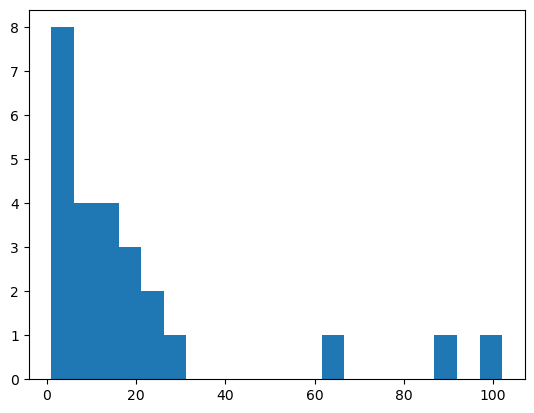

count     25.000000
mean      20.440000
std       26.019352
min        1.000000
25%        5.000000
50%       13.000000
75%       21.000000
max      102.000000
Name: Number of Nobel laureates, dtype: float64


In [183]:
plt.hist(df_clean["Number of Nobel laureates"], bins=20)
plt.show()
print(df_clean["Number of Nobel laureates"].describe())

In [191]:
df_clean = df_consumption[df_consumption["Number of Nobel laureates"] < 80]
df_clean
models = []
metrics_list = []
for i, col in enumerate(predictors, 0):
    X = df_clean[[col]]
    y = df_clean[[target_col]]
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    models.append(model)
    coef_dict = {"intercept": model.intercept_}
    coef_dict.update({col: coef for col, coef in zip(X.columns, model.coef_)})
    #mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    metrics_list.append({
        "Dataset": f"Dataset_{predictors[i]}",
        "R2": r2,
        "MSE": mse,
        "Coef" : list(model.coef_),
        "intercept" : float(model.intercept_)
    })
metrics_list


/var/folders/q8/ztn6c_nj7mz53t10363qj1600000gn/T/ipykernel_2673/2872977993.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "intercept" : float(model.intercept_)
/var/folders/q8/ztn6c_nj7mz53t10363qj1600000gn/T/ipykernel_2673/2872977993.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "intercept" : float(model.intercept_)


[{'Dataset': 'Dataset_Chocolate consumption (kg/year/capita)',
  'R2': 0.005195224813372867,
  'MSE': 182.17903100374232,
  'Coef': [array([-0.3753394])],
  'intercept': 15.946869139258222},
 {'Dataset': 'Dataset_Coffee consumption (kg/year/capita)',
  'R2': 0.011345237757272364,
  'MSE': 181.05277645940734,
  'Coef': [array([0.60259951])],
  'intercept': 10.599242744621238}]

In [ ]:
sns_plot = sns.pairplot(df_consumption, kind="scatter", diag_kind="kde", markers="o", height=2.5)